# Dimensioning

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

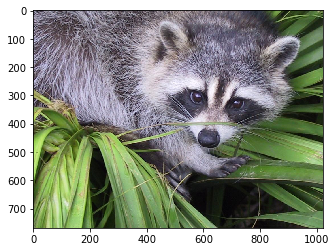

In [4]:
from scipy import misc

f=misc.face()
imageio.imwrite('face.jpg',f)

plt.imshow(f)
plt.show()



In [8]:
face=imageio.imread('face.jpg')
type(face)
face.shape
face.dtype

imageio.core.util.Array

(768, 1024, 3)

dtype('uint8')

In [11]:
#aca axis 0 es rows
#axis 1 columnas
face.shape[0] #768 filas
face.shape[1] #1024 columnas

#3 dimensiones (RGB)

768

1024

<function matplotlib.pyplot.show(*args, **kw)>

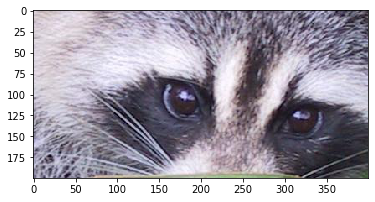

In [12]:
plt.imshow(face[200:400,400:800])
plt.show

# Filters: convolutions, low pass, high pass, directional pass

 **edge handling**, and there is a variety of methods to handle the edges:

* **Extend**: the nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.
* **Wrap**: the image is conceptually wrapped (or tiled) and values are taken from the opposite edge or corner.
* **Mirror**: the image is conceptually mirrored at the edges. For example, attempting to read a pixel 3 units outside an edge reads one 3 units inside the edge instead.
* **Crop**: any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.
* Kernel Crop: ny pixel in the kernel that extends past the input image isn't used and the normalizing is adjusted to compensate.

### Using your own kernels in scipy

We can use `ndimage.convolve` which has a variety of modes to deal with the edges. Usually, the best is to set the values out of the image to a value (cval) of 0. 

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Identity convolution')

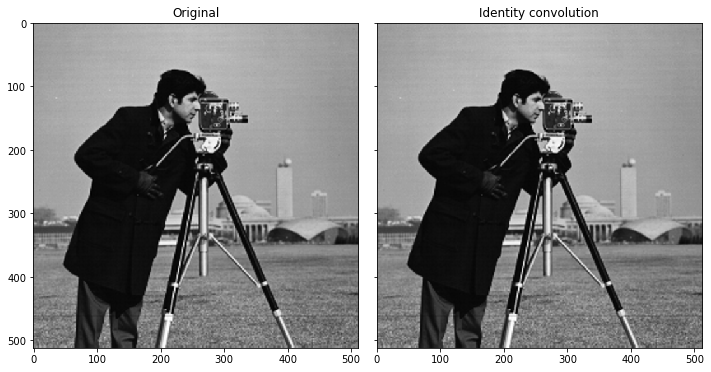

In [14]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [0,0,0], 
                    [0,1,0], 
                    [0,0,0]]) #Identity Filter

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Identity convolution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Box blur convolution')

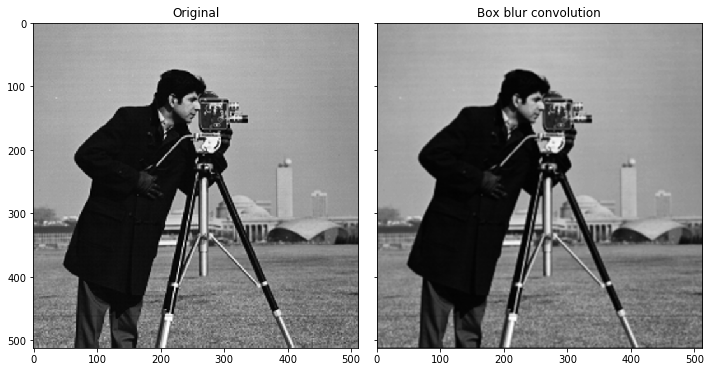

In [15]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) #Box Blur Filter

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian blur convolution')

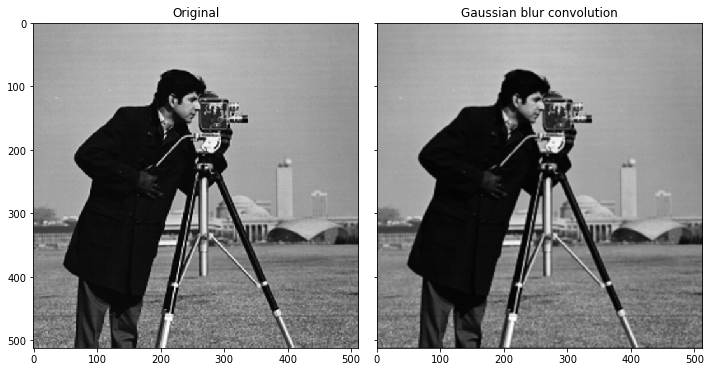

In [16]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [1/16,2/16,1/16], 
                    [2/16,4/16,2/16], 
                    [1/16,2/16,1/16]]) #Gaussian Blur 3*3 Filter

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Gaussian blur convolution')

plt.tight_layout()
plt.show()

####High pass filtering

A high pass filter is the basis for most sharpening methods. An image is sharpened when contrast is enhanced between adjoining areas with little variation in brightness or darkness

A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information. The kernel of the high pass filter is designed to increase the brightness of the center pixel relative to neighboring pixels. The kernel array usually contains a single positive value at its center, which is completely surrounded by negative values. 

# High frecuency extraction (edges)

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'High pass filter convolution')

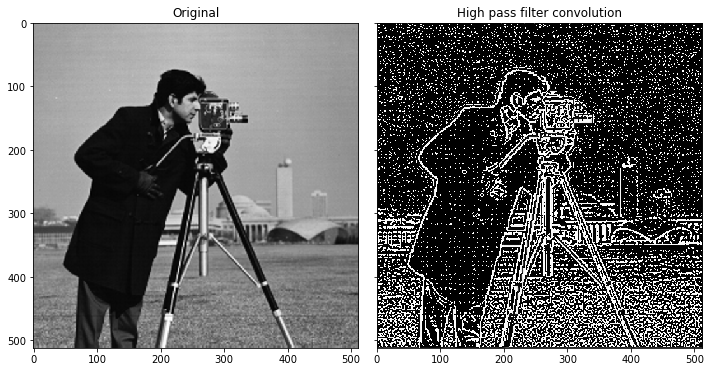

In [17]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

plt.tight_layout()
plt.show()

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Sharpen convolution')

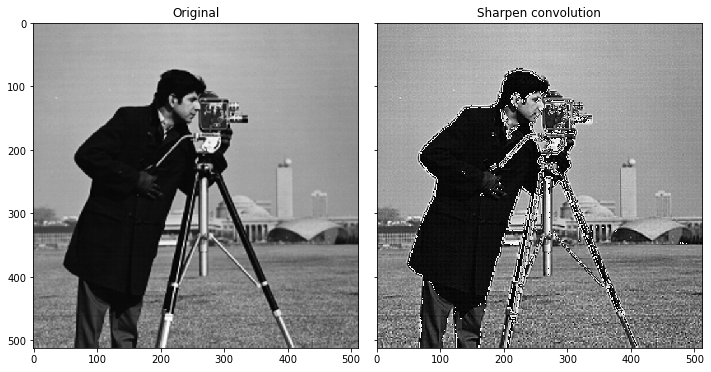

In [18]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

### Directional filtering: edge detection


[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Vertical edge convolution')

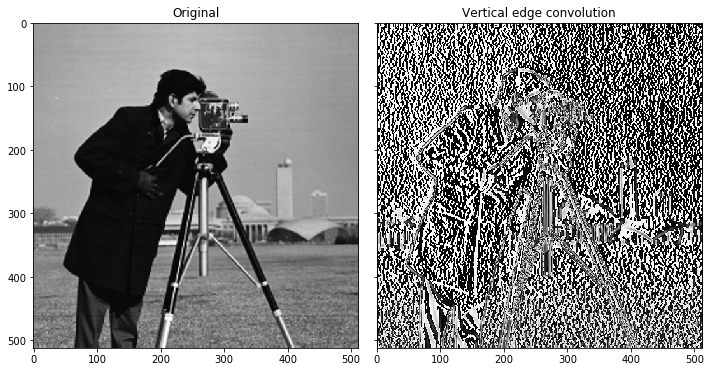

In [20]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]]) #vertical Filter

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Horizontal edge convolution')

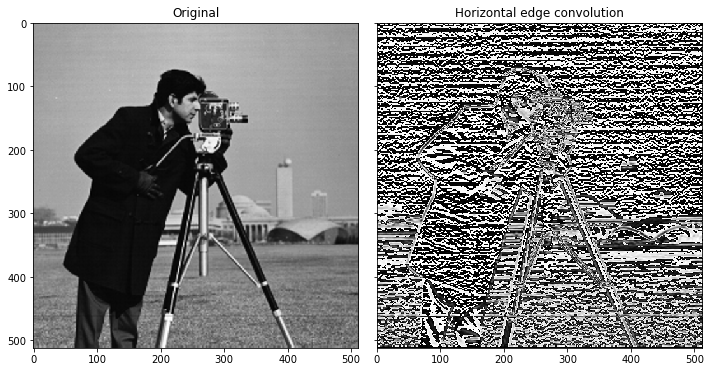

In [22]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]]) #Horizontal Filter

print(kernel)

filtered = ndimage.convolve(image, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()

[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Edge convolution')

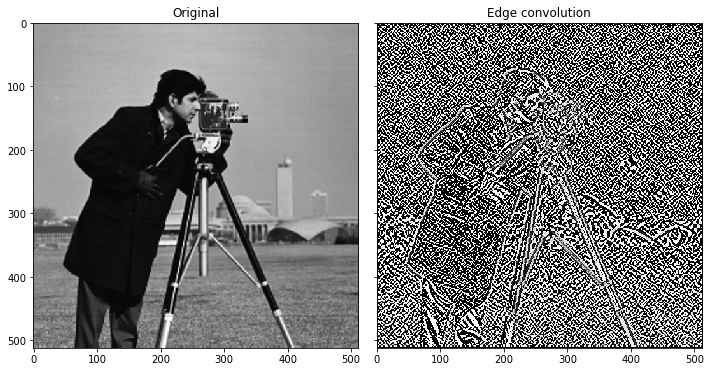

In [23]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel_edge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]]) #Edge Detection Filter

print(kernel_edge)

edge = ndimage.convolve(image, kernel_edge, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge, cmap=plt.cm.gray)
ax[1].set_title('Edge convolution')

plt.tight_layout()
plt.show()

### Kernel combinations: gaussian + edge 

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian convolution')

Text(0.5, 1.0, 'Gaussian plus edge convolution')

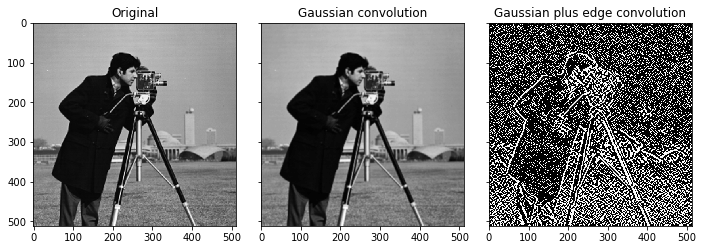

In [25]:
import imageio
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.data import camera

image = camera()

kernel_gaussian = 1/512*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 

kernel_edge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]])

print(kernel)

filtered = ndimage.convolve(image, kernel_gaussian, mode='mirror', cval=0.0)
edge = ndimage.convolve(filtered, kernel_edge, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Gaussian convolution')

ax[2].imshow(edge, cmap=plt.cm.gray)
ax[2].set_title('Gaussian plus edge convolution')

plt.tight_layout()
plt.show()

# ## Mathematical morphology: filters for array manipulation

Mathematical morphology it is extremely useful to clean dirty data once we have a prediction, for instance using erosion or dilation.

### Erosion

The 3×3 square of ones is probably the most common structuring element used in erosion operations, but others can be used. A larger structuring element produces a more extreme erosion effect, although usually very similar effects can be achieved by repeated erosions using a smaller similarly shaped structuring element. With larger structuring elements, it is quite common to use an approximately disk shaped structuring element, as opposed to a square one.

The erosion is then a minimum filter, it replaces the value of a pixel by the minimal value covered by the structuring element.

![alt text](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/erodbin.gif)

Text(0.5, 1.0, 'Original array')

Text(0.5, 1.0, 'Eroded array')

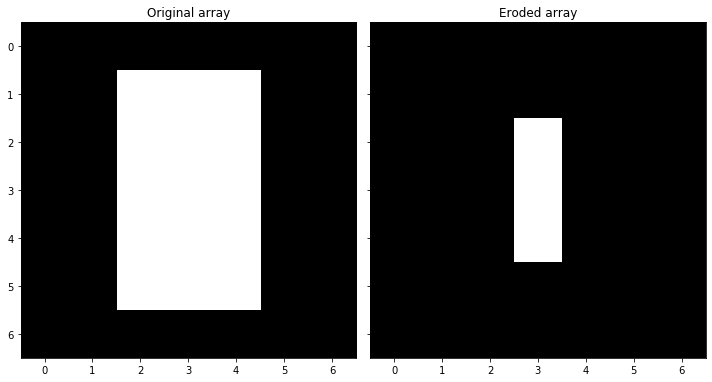

In [28]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Original array
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1

 # Erosion
e = ndimage.binary_erosion(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(e, cmap=plt.cm.gray)
ax[1].set_title('Eroded array')

plt.tight_layout()
plt.show()

### Dilation

The 3×3 square of ones is probably the most common structuring element used in dilation operations, but others can be used. A larger structuring element produces a more extreme dilation effect, although usually very similar effects can be achieved by repeated dilations using a smaller but similarly shaped structuring element. With larger structuring elements, it is quite common to use an approximately disk shaped structuring element, as opposed to a square one.

It works as a maximum filter.

![alt text](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/diltbin.gif)

Text(0.5, 1.0, 'Original array')

Text(0.5, 1.0, 'Dilated array')

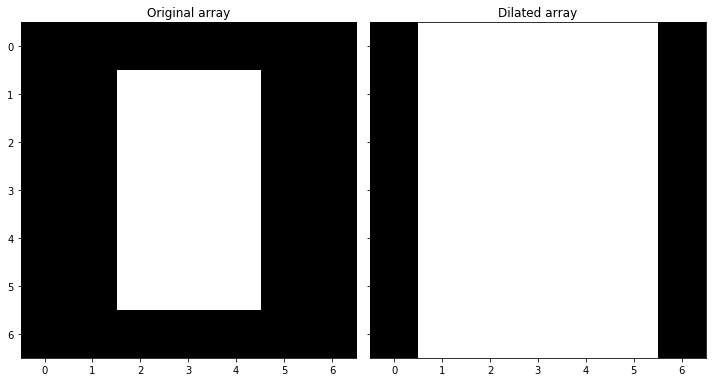

In [29]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Original array
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1

 # Dilation
d = ndimage.binary_dilation(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(d, cmap=plt.cm.gray)
ax[1].set_title('Dilated array')

plt.tight_layout()
plt.show()

### Opening: erosion + dilation

The structure kernel of binary opening, if we do not pass a matrix square of ones, it results to a sort of "cross". Which is useful to smooth images.

Structuring element used for the opening. Non-zero elements are considered True. If no structuring element is provided an element is generated with a square connectivity equal to one (i.e., only nearest neighbors are connected to the center, diagonally-connected elements are not considered neighbors).

![alt text](https://scipy-lectures.org/_images/diamond_kernel.png)

As with erosion and dilation, it is very common to use this 3×3 structuring element. The effect in the above figure is rather subtle since the structuring element is quite compact and so it fits into the foreground boundaries quite well even before the opening operation. To increase the effect, multiple erosions are often performed with this element followed by the same number of dilations. This effectively performs an opening with a larger square structuring element.

![alt text](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/openbin.gif)

Text(0.5, 1.0, 'Original array')

Text(0.5, 1.0, 'Opening array')

Text(0.5, 1.0, 'Opening smoothed array')

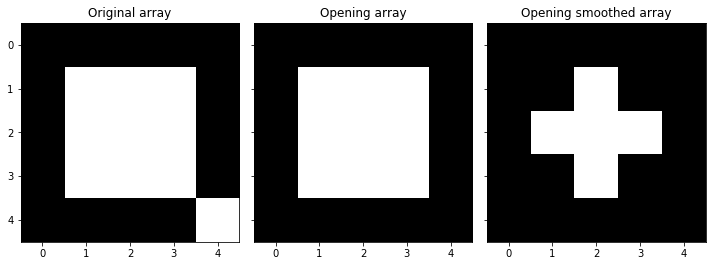

In [30]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Original array
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1

 # Opening
o = ndimage.binary_opening(a, structure=np.ones((3,3))).astype(a.dtype)

# Opening with "cross" kernel
oc = ndimage.binary_opening(a).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(o, cmap=plt.cm.gray)
ax[1].set_title('Opening array')

ax[2].imshow(oc, cmap=plt.cm.gray)
ax[2].set_title('Opening smoothed array')

plt.tight_layout()
plt.show()

### Closing: dilation + erosion
As with erosion and dilation, this particular 3×3 structuring element is the most commonly used, and in fact many implementations will have it hardwired into their code, in which case it is obviously not necessary to specify a separate structuring element. To achieve the effect of a closing with a larger structuring element, it is possible to perform multiple dilations followed by the same number of erosions.

Closing can sometimes be used to selectively fill in particular background regions of an image. Whether or not this can be done depends upon whether a suitable structuring element can be found that fits well inside regions that are to be preserved, but doesn't fit inside regions that are to be removed.

![alt text](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/closebin.gif)

Text(0.5, 1.0, 'Original array')

Text(0.5, 1.0, 'Closing array')

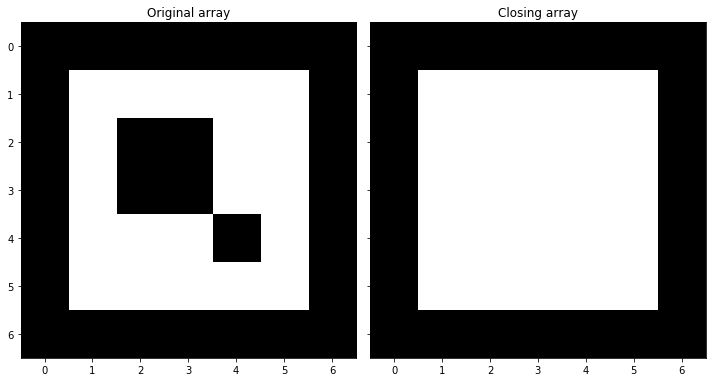

In [32]:
 import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Original array
a = np.zeros((7,7), dtype=np.int)
a[1:6, 1:6] = 1
a[2:4, 2:4] = 0
a[4:5, 4:5] = 0

 # Closing
o = ndimage.binary_closing(a, structure=np.ones((3,3))).astype(a.dtype)

# Plotting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(a, cmap=plt.cm.gray)
ax[0].set_title('Original array')

ax[1].imshow(o, cmap=plt.cm.gray)
ax[1].set_title('Closing array')

plt.tight_layout()
plt.show()

### Application: noise removal

After segmentation operations and inferences, mathematical morphology it is extremely useful for noise removal:

Text(0.5, 1.0, 'Image after segmentation')

Text(0.5, 1.0, 'Opening with square element')

Text(0.5, 1.0, 'Opening with cross element')

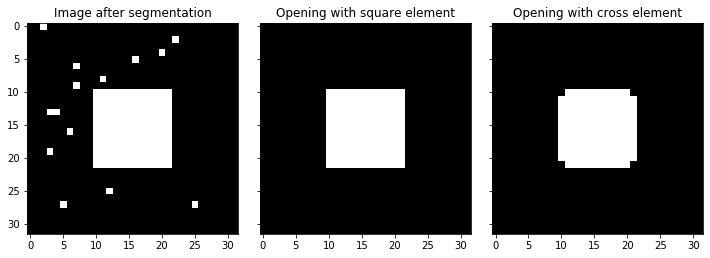

In [33]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Fake image after segmentation
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
np.random.seed(2)
x, y = (32*np.random.random((2, 20))).astype(np.int)
square[x, y] = 1

# Opening with a square kernel
open_square = ndimage.binary_opening(square, structure=np.ones((3,3)))

# Opening with a cross kernel
open_square_cross = ndimage.binary_opening(square)

# Plotting
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(square, cmap=plt.cm.gray)
ax[0].set_title('Image after segmentation')

ax[1].imshow(open_square, cmap=plt.cm.gray)
ax[1].set_title('Opening with square element')

ax[2].imshow(open_square_cross, cmap=plt.cm.gray)
ax[2].set_title('Opening with cross element')

plt.tight_layout()
plt.show()

# Segmentation

Segmentation is a computer vision technique to "segment" an image in meaningful parts. Semantic segmentation occurs when we do not only "segment" the image, but classify the segments in different groups.

NameError: name 'binary_img' is not defined

# Scikit image: streamlining Python image processing

Scikit-image is an advanced library for image processing in Python. It is currently included in the SciPy ecosystem.

Many examples of its usage are available at the scikit-image

Within scikit-image, we can find different kinds of functions that streamline our image processing capabilities, from boilerplate utility functions to high-level recent algorithms.

    Filters: functions transforming images into other images.
        NumPy machinery
        Common filtering algorithms

    Data reduction functions: computation of image histogram, position of local maxima, of corners, etc.

    Other actions: I/O, visualization, etc.



<function matplotlib.pyplot.show(*args, **kw)>

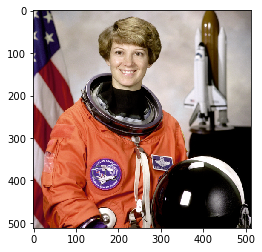

In [36]:
from skimage import data  # most functions are in subpackages
from skimage.io import imsave
import matplotlib.pyplot as plt

astronaut = data.astronaut()
imsave("astronaut.jpeg", astronaut)

plt.imshow(astronaut)
plt.show

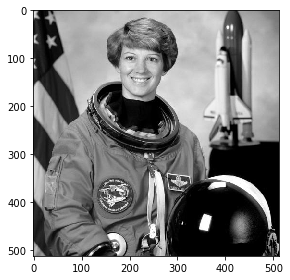

In [37]:
from skimage.io import imread, imshow

astronaut_loaded = imread("astronaut.jpeg", as_gray=True)
imshow(astronaut_loaded)


**Image type and coordinates**

* 2D grayscale (row, col)

* 2D multichannel (eg. RGB) (row, col, ch)

* 3D grayscale (pln, row, col)

* 3D multichannel (pln, row, col, ch)

# Color manipulation

We can represent different color spaces using the submodule skimage.color.

Color spaces are very important since some computer vision tasks are better suited with other tipe of color spaces such as HSV (Hue, Saturation, Value) or CYMK, which is used for printing.

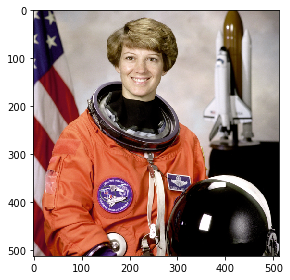

In [38]:
from skimage import data
from skimage.io import imread, imshow  # most functions are in subpackages

astronaut = data.astronaut()

# Normal RGB
imshow(astronaut)

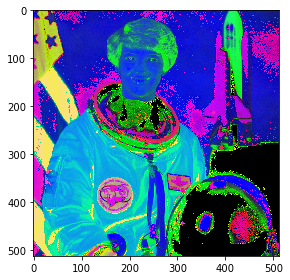

In [40]:
from skimage.color import rgb2hsv  #HSV

imshow(rgb2hsv(astronaut))

# Inverting images

An inverted image is the "negative" of the real image. For binary images, True values become False and conversely. For grayscale images, pixel values are replaced by the difference of the maximum value of the data type and the actual value. For RGB images, the same operation is done for each channel.


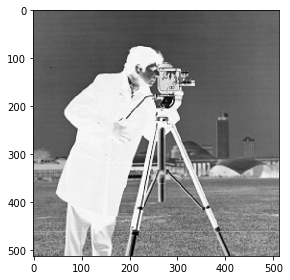

In [41]:
from skimage.io import imshow
from skimage import data
from skimage import util
img = data.camera()
inverted_img = util.invert(img)

imshow(inverted_img)

# ### Manipulating contrast and exposure
Scikit image comes with a contrast enhancer built in, `rescale_intensity()` which consists in stretching pixel values to the whole allowed range, using a linear transformation.



10 197


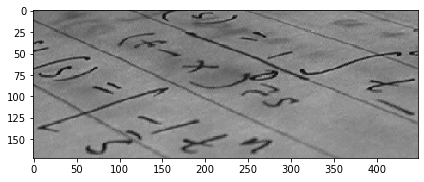

In [43]:
from skimage.io import imshow
from skimage import data
from skimage import exposure
text = data.text()
print(text.min(), text.max())
imshow(text)

0 255


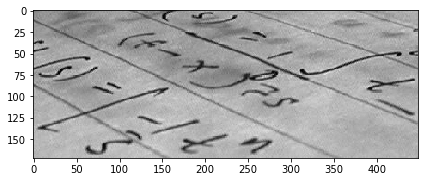

In [44]:
better_contrast = exposure.rescale_intensity(text)
print(better_contrast.min(), better_contrast.max())
imshow(better_contrast)

# Using a more intelligent approach: edge based segmentation

We can take advantage of the local contrast, looking at the edges that enclose the coins. We can use an edge detector like canny, or use the filter Sobel that we already know.

Sobel detection refers to computing the gradient magnitude of an image using 3x3 filters. Where "gradient magnitude" is, for each a pixel, a number giving the absolute value of the rate of change in light intensity in the direction that maximizes this number.

Canny edge detection can be understood as an intelligent thresholding of a Saobel filter. It actually goes a bit further by removing speckle noise with a low pass filter first, then applying a Sobel filter, and then doing non-maximum suppression to pick out the best pixel for edges when there are multiple possibilities in a local neighborhood.
 

Text(0.5, 1.0, 'Canny')

Text(0.5, 1.0, 'Sobel')

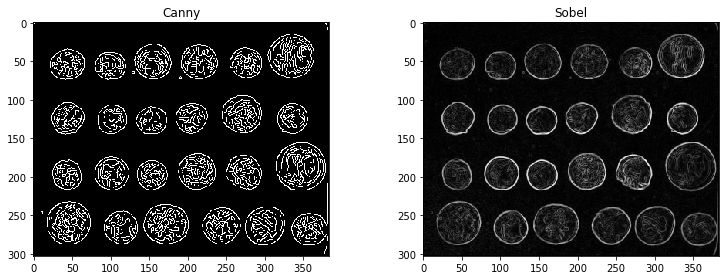

In [45]:
from skimage import data
from skimage.feature import canny
from skimage.filters import sobel

coins = data.coins()

canny_coins = canny(coins/255.)

sobel_coins = sobel(coins)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_coins, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_coins, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show()

# ### Using mathematical morphology to fill the holes

We could use the `scipy.ndimage `closing to fill the holes, but actually scipy comes also packaged already with `binary_fill_holes` which does a similar operation

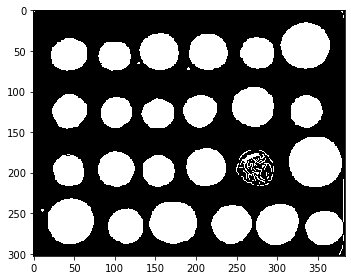

In [46]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(canny_coins)
imshow(fill_coins)

# Removing small objects

Most of the coins have been segmented from the background. However there are some objects from the background that needs to be removed. We can use the ndimage from scipy to label the objects that are smaller than certain threshold:
 

113


/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


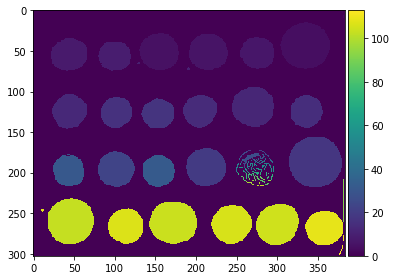

In [47]:
# we call the label function
label_objects, nb_labels = ndi.label(fill_coins)
print(nb_labels)
imshow(label_objects)

'\nWe should have 24 objects (24 coins) but we actually have 113!\nThat is due to the small objects of the bad segmented coin, so we can mask based \non size.\n'

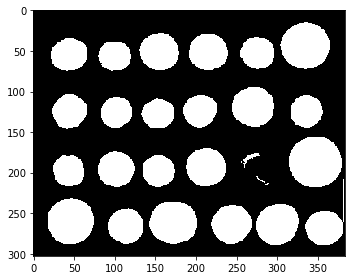

In [48]:
# We calculate the size of isolated objects.
"""
We should have 24 objects (24 coins) but we actually have 113!
That is due to the small objects of the bad segmented coin, so we can mask based 
on size.
"""
# We get the sizes for each object
sizes = np.bincount(label_objects.ravel())

# Then, we mask everything that is above 20 to try to get most of coins
mask_sizes = sizes > 20
mask_sizes[0] = 0

# We apply the mask to label objects
coins_cleaned = mask_sizes[label_objects]

imshow(coins_cleaned)

# ### Region based segmentation
The problem with canny edge detector is that sometimes it does not close the shapes. And then the filling function did not perform correctly. We could finalize the segmentation by doing some opening and closing, but it will be too "handcrafted".

We can go ahead and try with some region based segmentation.

Let us first determine markers of the coins and the background. These markers are pixels that we can label unambiguously as either object or background. Here, the markers are found at the two extreme parts of the histogram of grey values.

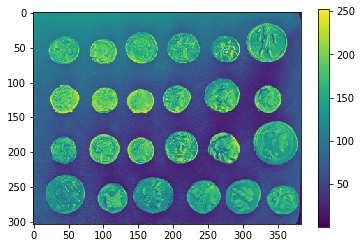

In [51]:
import matplotlib.pyplot as plt
plt.imshow(coins)
plt.colorbar()
plt.show()

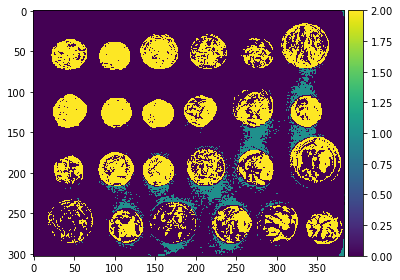

In [52]:
# Let's create a zeros array with the same shape as coins
markers = np.zeros_like(coins)

# When the pixels are below 30 (see image above), we can label as background(1)
markers[coins < 30] = 1

# When the pixels are above 150 (see image above), we can label as coins(2)
markers[coins > 150] = 2
imshow(markers)

# Using a watershed algorithm

We will use these markers in a watershed segmentation. The name watershed comes from an analogy with hydrology. The watershed transform floods an image of elevation starting from markers, in order to determine the catchment basins of these markers. Watershed lines separate these catchment basins, and correspond to the desired segmentation.

The choice of the elevation map is critical for good segmentation. Here, the amplitude of the gradient provides a good elevation map. We use the Sobel operator for computing the amplitude of the gradient


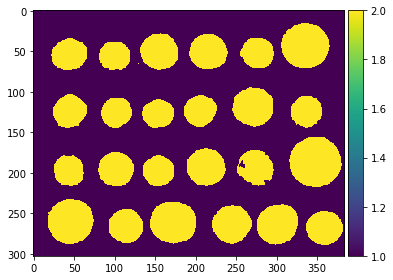

In [53]:
from skimage.morphology import watershed
segmentation = watershed(sobel_coins, markers)
imshow(segmentation)

### Removing some easy holes using mathematical morphology

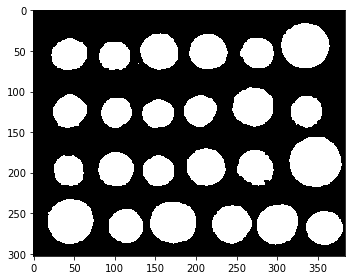

In [54]:
# Remove the background values before filling!
segmentation_treshold = ndi.binary_fill_holes(segmentation-1)
imshow(segmentation_treshold)

# ### Add the labels again!


25


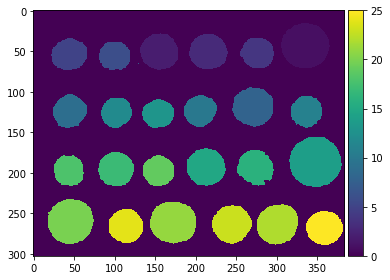

In [55]:
labeled_coins, _ = ndi.label(segmentation_treshold)
print(_)
imshow(labeled_coins)